In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [18]:
CENTERS = 20
DIM = 100
points = ds.make_blobs(1000, DIM, CENTERS)

In [3]:
# cluster_points = [[[], []] for x in range(CENTERS)]
# for p, l in zip(points[0], points[1]):
#     cluster_points[l][0].append(p[0])
#     cluster_points[l][1].append(p[1])
# cluster_points = np.array(cluster_points)
# for c in cluster_points:
#     plt.scatter(c[0], c[1])

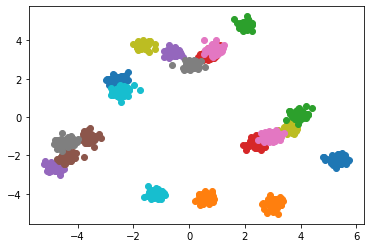

In [19]:
pca = decomposition.PCA(n_components=2)
x = points[0]
x_std = StandardScaler().fit_transform(x)
skl_pca = pca.fit_transform(x_std)
cluster_points = [[[], []] for x in range(CENTERS)]
for p, l in zip(skl_pca, points[1]):
    cluster_points[l][0].append(p[0])
    cluster_points[l][1].append(p[1])
cluster_points = np.array(cluster_points)
for c in cluster_points:
    plt.scatter(c[0], c[1])

In [20]:
# NIPALs
def norm(X):
    # return (np.sum(X**10))**(0.1)
    return np.linalg.norm(X)


X = points[0]
X = StandardScaler().fit_transform(X)
e = 1e-5
R = np.zeros_like(X)
T = np.zeros_like(R)
K = X.shape[1]
J = 10000
P = np.zeros((K, K))
R = X
for k in range(2):
    lamda = 0
    T[:, k] = R[:, k]
    for j in range(J):
        P[:, k] = np.dot(R.T, T[:, k])
        P[:, k] = P[:, k]/norm(P[:, k])
        T[:, k] = np.dot(R, P[:, k])
        lamda_dash = norm(T[:, k])
        if(np.abs(lamda_dash-lamda) <= e):
            break
        lamda = lamda_dash
    R = R-np.dot(T[:, k][np.newaxis].T, P[:, k][np.newaxis])

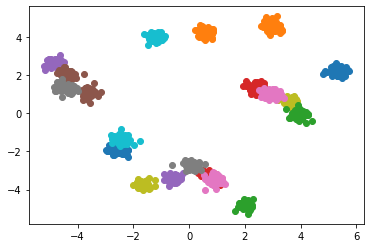

In [21]:
cluster_points = [[[], []] for x in range(CENTERS)]
for p, l in zip(T[..., :2], points[1]):
    cluster_points[l][0].append(p[0])
    cluster_points[l][1].append(p[1])
cluster_points = np.array(cluster_points)
for c in cluster_points:
    plt.scatter(c[0], c[1])